# Introduction



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time
import math
import datetime
%matplotlib inline

def darkgrid():
    sns.set_style('darkgrid')
    
def dark():
    sns.set_style('dark')

# set theme
darkgrid()

In [2]:
airbnb_df = pd.read_csv('AB_NYC_2019.csv')

In [3]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

This dataset contains 48,895 rows and 15 columns. Most rows have complete data, there are a few entries with missing data however, the columns containing missing data are `name`, `host_name`, `last_review` and `reviews_per_month`.

In [5]:
airbnb_df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [6]:
airbnb_df.loc[airbnb_df['host_id']==2787]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10372,7937553,Riomaggiore Room. Queen Bedroom in Bklyn Townh...,2787,John,Brooklyn,Bensonhurst,40.60951,-73.97622,Private room,99,1,21,2018-10-27,0.50,6,153
13583,10160215,Torre del Lago Room.,2787,John,Brooklyn,Gravesend,40.60755,-73.97410,Private room,79,1,17,2019-06-26,0.40,6,174
13688,10267242,Cinque Terre Room. Clean and Quiet Queen Bedroom,2787,John,Brooklyn,Gravesend,40.60810,-73.97541,Private room,149,1,24,2019-05-11,0.64,6,180
13963,10593675,"La Spezia room. Clean, quiet and comfortable bed",2787,John,Brooklyn,Bensonhurst,40.60951,-73.97642,Shared room,79,1,15,2018-09-29,0.43,6,180
21556,17263207,Brooklyn home. Comfort and clean. Liguria room.,2787,John,Brooklyn,Bensonhurst,40.60877,-73.97382,Private room,49,1,19,2019-06-08,0.70,6,360


### Data Cleaning

In [7]:
airbnb = airbnb_df.copy()

In [8]:
# drop columns not required: name, host_name

#airbnb = airbnb.drop()

### Data analysis


In [9]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
#nights = airbnb.minimum_nights.value_counts().reset_index.sort_values()
nights = airbnb.minimum_nights.value_counts()
nights

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

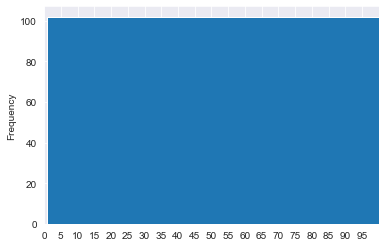

In [11]:
nights.plot(kind='hist',bins=10)
plt.xlim(0,100)
tick_locs = np.arange(0,95+5,5)
plt.xticks(tick_locs);

In [12]:
nights = airbnb[airbnb.minimum_nights<=30]

### What is the distribution of the minimum number of nights for each airbnb listing?

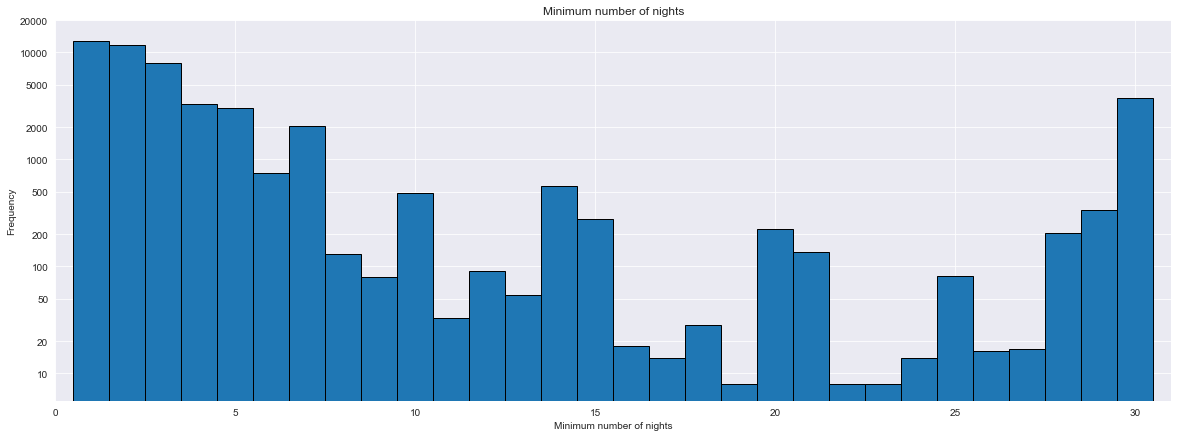

In [13]:
# set threshold for minimum number of nights
plt.figure(figsize=(20,7))

threshold = 30

# set bin size
bins = np.arange(0,threshold+1,1)
nights = airbnb[airbnb.minimum_nights<=threshold]

# plot graph
plt.hist(data=nights,x='minimum_nights',bins=bins+.5,ec='Black')
plt.yscale('log')
y_ticks = [10,20,50,100,200,500,1000,2000,5000,10000,20000]
y_labels = ['{}'.format(v) for v in y_ticks]

plt.yticks(y_ticks,y_labels)
# add labels
plt.xlim(0,threshold+1)
plt.xlabel('Minimum number of nights')
plt.ylabel('Frequency')
plt.title('Minimum number of nights');

When comparing the distribution of the minimum number of nights required to make a booking with each of the different airbnb hosts, most had a minimum of one. I decided to take the log of the y scale in order to improve the visibility of the lower frequencies. When hosts set a higher minimum number of nights, there are certain numbers that are more favourable. These include 7 nights for a full week; 10 days; 14 days for two weeks; 20 days; 21 days for 3 weeks or 30 days. There are very few hosts that will set a minimum between these thresholds. The majority of hosts however have set a minimum of one week or less.

### What is the distribution of airbnb listings by neighbourhood group?

In [14]:
# value counts on bars
def count(df,col):
    count = df[col].value_counts()
    for i in range (count.shape[0]):
        values = count[i]
        plt.text(i,values,values,ha='center',va='bottom',color='black',size=12)
    plt.yticks([]) #remove yticks;

In [58]:
def bar(df,col):
    #data setup
    freq = df[col].value_counts()
    order = freq.index
    
    plt.figure(figsize=(20,7))
    base_colour = sns.color_palette()[0]
    
    #plot graph
    sns.countplot(data=df,x=col,order=order,color=base_colour)
    
def labels(title_name, x, y):
    plt.title(title_name)
    plt.xlabel(x)
    plt.ylabel(y)

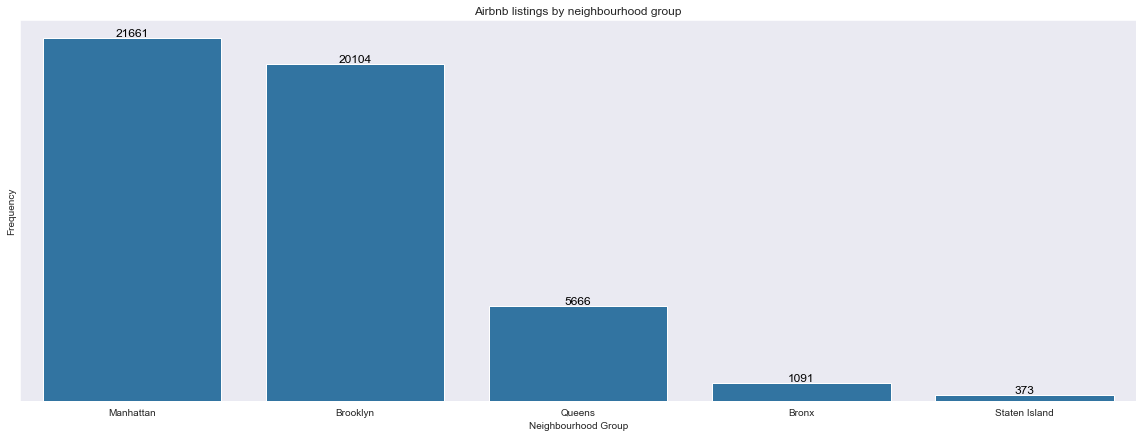

In [59]:
bar(airbnb,'neighbourhood_group')
labels('Airbnb listings by neighbourhood group','Neighbourhood Group', 'Frequency')
count(airbnb,'neighbourhood_group')

### What is the distribution of the different room types?

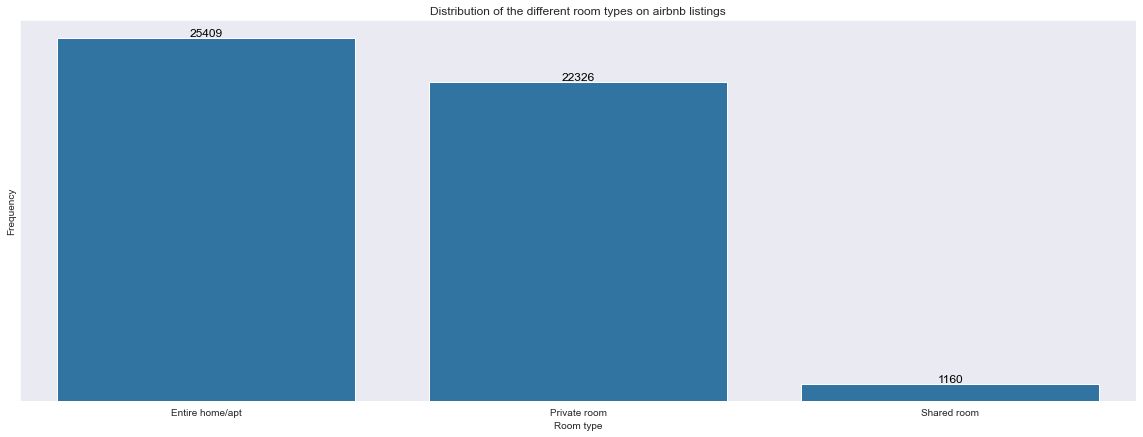

In [35]:
bar(airbnb,'room_type')
labels('Distribution of the different room types on airbnb listings','Room type','Frequency')
count(airbnb,'room_type')

The most common room type listed on airbnb is to have the entire home or apartment to yourself. There were over 25,000 listings in New York for these whilst it was closely followed by a private room at 22,326. The least common room type was to have a shared room, there were only 1,160 of these type of listings.

In [62]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### What are the availability of the listings throughout the year?

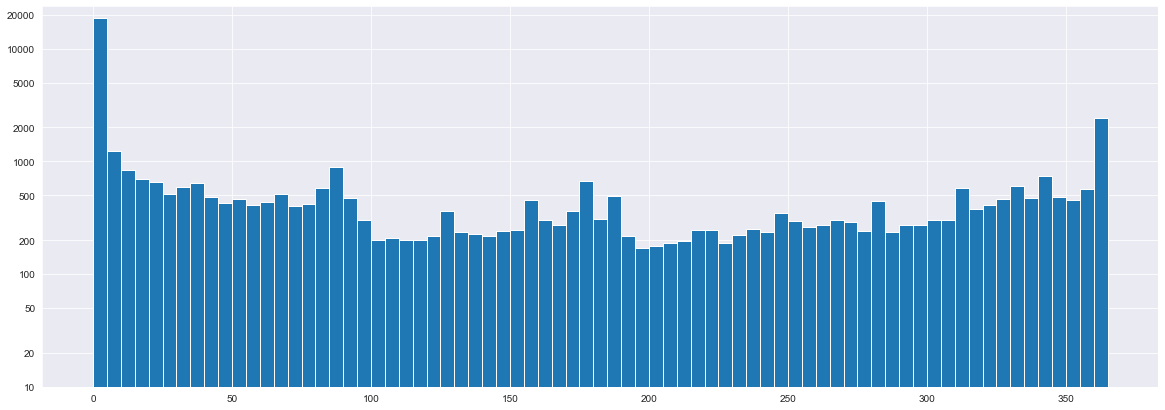

In [76]:
plt.figure(figsize=(20,7))

#plot
plt.hist(data=airbnb,x='availability_365',bins=73)

# plot labels and axis
plt.yscale('log')
y_ticks = [10,20,50,100,200,500,1000,2000,5000,10000,20000]
y_labels = ['{}'.format(v) for v in y_ticks]
plt.yticks(y_ticks,y_labels);

### What are the top 10 busiest hosts?

In [16]:
# data setup
top_hosts = airbnb.host_id.value_counts().head(10)
host_order = top_hosts.index

In [17]:
# list host_id and number of listings
top_hosts

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [18]:
# table showing listings by the top 10 hosts
top_hosts_sub = airbnb.loc[airbnb['host_id'].isin(host_order)]
top_hosts_sub

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2631,1390532,Amazing Designer Loft in BK Factory,7503643,Vida,Brooklyn,Greenpoint,40.72456,-73.94343,Entire home/apt,129,30,7,2019-03-27,0.11,52,189
2636,1392673,Spacious Factory Converted Loft,7503643,Vida,Brooklyn,Greenpoint,40.72756,-73.94230,Entire home/apt,129,30,6,2018-09-02,0.09,52,249
2708,1460017,Lovely Factory Loft in Greenpoint!,7503643,Vida,Brooklyn,Greenpoint,40.72732,-73.94076,Entire home/apt,129,30,6,2018-09-11,0.08,52,277
2749,1486099,All New Bohemian Chic 1BR Loft,7503643,Vida,Brooklyn,Greenpoint,40.72267,-73.94362,Entire home/apt,149,30,9,2018-02-18,0.13,52,343
2782,1524302,Huge 1 Bedroom Loft at Habitat 101!,7503643,Vida,Brooklyn,Greenpoint,40.72686,-73.94177,Entire home/apt,149,30,7,2018-10-31,0.11,52,281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,NaN,232,188


In [19]:
name_order = top_hosts_sub.host_name.value_counts()
name_order

Sonder (NYC)         327
Blueground           232
Kara                 121
Kazuya               103
Jeremy & Laura        96
Sonder                96
Corporate Housing     91
Ken                   87
Pranjal               65
Vida                  52
Name: host_name, dtype: int64

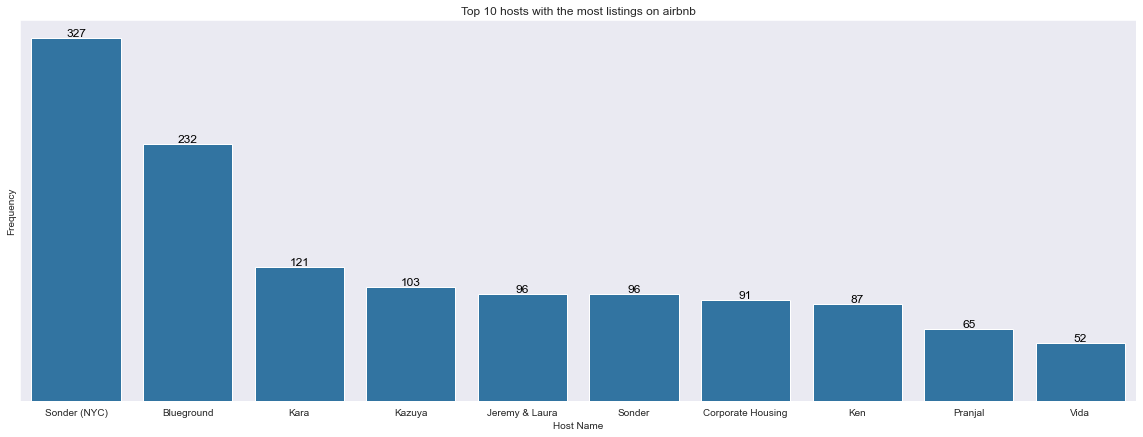

In [20]:
plt.figure(figsize=(20,7))

# bar order
host_order = top_hosts_sub['host_name'].value_counts().index

# plot graph
sns.countplot(data=top_hosts_sub,x='host_name',order=host_order,color=base_colour)

# labels
plt.title('Top 10 hosts with the most listings on airbnb')
plt.xlabel('Host Name')
plt.ylabel('Frequency')

count(top_hosts_sub,'host_name');

ideas:
- do certain areas have higher average rental prices?
- which hosts are the busiest?
- How does the room type affect price?
- heatmap of average price?
- what is the importance of number of reviews on rental price?
- who has the most listings?
- regression model to predict price?

In [21]:
test = np.arange(0,5,100)

In [22]:
test

array([0])